In [3]:
import numpy as np
from math import log, sqrt, exp
from scipy import stats

In [4]:
def bs_put_value(s, k, t, r, sigma):
    d1 = (log(s/k) + (r + 0.5 * sigma ** 2) * t) / (sigma * sqrt(t))
    d2 = d1 - sigma * sqrt(t)

    n_d1 = stats.norm.cdf(-d1, 0.0, 1.0)
    n_d2 = stats.norm.cdf(-d2, 0.0, 1.0)

    put_price = (k * exp(-r * t) * n_d2 - s * n_d1)

    return put_price

In [5]:
def DI_put_value(s, k, sb, t, r, sigma ):
    d3 = (log(s / sb) + (r + (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d4 = (log(s / sb) + (r - (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d5 = (log(s / sb) - (r - (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d6 = (log(s / sb) - (r + (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d7 = (log((s * k) / (sb ** 2)) - (r - (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d8 = (log((s * k) / (sb ** 2)) - (r + (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))

    n_d3 = stats.norm.cdf(d3, 0.0, 1.0)
    n_d4 = stats.norm.cdf(d4, 0.0, 1.0)
    n_d5 = stats.norm.cdf(d5, 0.0, 1.0)
    n_d6 = stats.norm.cdf(d6, 0.0, 1.0)
    n_d7 = stats.norm.cdf(d7, 0.0, 1.0)
    n_d8 = stats.norm.cdf(d8, 0.0, 1.0)

    a = (sb / s) ** (-1 + (2 * r) / sigma ** 2)
    b = (sb / s) ** (1 + (2 * r) / sigma ** 2)

    put_DI_price = (k * exp(-r * t)) * ((1 - n_d4) + a * (n_d7 - n_d5)) - s * ((1 - n_d3) + b * (n_d8 - n_d6))

    return put_DI_price

In [6]:
def DO_put_value(s, k, sb, t, r, sigma):

    d1 = (log(s / k) + (r + (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d2 = (log(s / k) + (r - (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d3 = (log(s / sb) + (r + (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d4 = (log(s / sb) + (r - (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d5 = (log(s / sb) - (r - (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d6 = (log(s / sb) - (r + (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d7 = (log((s * k) / (sb ** 2)) - (r - (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))
    d8 = (log((s * k) / (sb ** 2)) - (r + (sigma ** 2 / 2)) * t) / (sigma * sqrt(t))

    n_d1 = stats.norm.cdf(d1, 0.0, 1.0)
    n_d2 = stats.norm.cdf(d2, 0.0, 1.0)
    n_d3 = stats.norm.cdf(d3, 0.0, 1.0)
    n_d4 = stats.norm.cdf(d4, 0.0, 1.0)
    n_d5 = stats.norm.cdf(d5, 0.0, 1.0)
    n_d6 = stats.norm.cdf(d6, 0.0, 1.0)
    n_d7 = stats.norm.cdf(d7, 0.0, 1.0)
    n_d8 = stats.norm.cdf(d8, 0.0, 1.0)

    a = (sb / s) ** (-1 + (2 * r) / sigma ** 2)
    b = (sb / s) ** (1 + (2 * r) / sigma ** 2)

    put_DO_price = (k * exp(-r * t)) * ((n_d4 - n_d2) - a * (n_d7 - n_d5)) - s * ((n_d3 - n_d1) - b * (n_d8 - n_d6))
    return put_DO_price

In [7]:
s = 100
k = 105
r = 0.05
t = 0.75
sigma = 0.4
sb_l = list(range(1, 71))
sb = sb_l[::-10]
sb.append(1)

for i in sb:
    put_DI_price = DI_put_value(s, k, i, t, r, sigma)
    print('The Down-and-in put price when Sb = ' + str(i) + ' is: ${:20.16f}'.format(put_DI_price))
put_bs_price = bs_put_value(s, k, t, r, sigma)
print('\nThe price under BS model is: ${:20.16f}\n'.format(put_bs_price))

The Down-and-in put price when Sb = 70 is: $ 10.7123805024734793
The Down-and-in put price when Sb = 60 is: $  6.5767849830701799
The Down-and-in put price when Sb = 50 is: $  2.7108351221013351
The Down-and-in put price when Sb = 40 is: $  0.6035589440605822
The Down-and-in put price when Sb = 30 is: $  0.0459820682159838
The Down-and-in put price when Sb = 20 is: $  0.0003736145115562
The Down-and-in put price when Sb = 10 is: $  0.0000000042060280
The Down-and-in put price when Sb = 1 is: $  0.0000000000000000

The price under BS model is: $ 14.4040200947648245



In [8]:
DO_sb = 60
DO_sigma_l = np.arange(0.1, 0.56, 0.05)
DO_sigma = np.flipud(DO_sigma_l)

for i in DO_sigma:
    put_DO_price = DO_put_value(s, k, DO_sb, t, r, i)
    print('The Down-and-out put price when sigma = {:4.2f} is: ${:20.16f}'.format(i, put_DO_price))

The Down-and-out put price when sigma = 0.55 is: $  5.1449994270630768
The Down-and-out put price when sigma = 0.50 is: $  5.9955080372755880
The Down-and-out put price when sigma = 0.45 is: $  6.9154003443027712
The Down-and-out put price when sigma = 0.40 is: $  7.8272351116946339
The Down-and-out put price when sigma = 0.35 is: $  8.5781405678049865
The Down-and-out put price when sigma = 0.30 is: $  8.9227804658101633
The Down-and-out put price when sigma = 0.25 is: $  8.5764875000192902
The Down-and-out put price when sigma = 0.20 is: $  7.4301125227782236
The Down-and-out put price when sigma = 0.15 is: $  5.7940362774164598
The Down-and-out put price when sigma = 0.10 is: $  4.0706333562221317


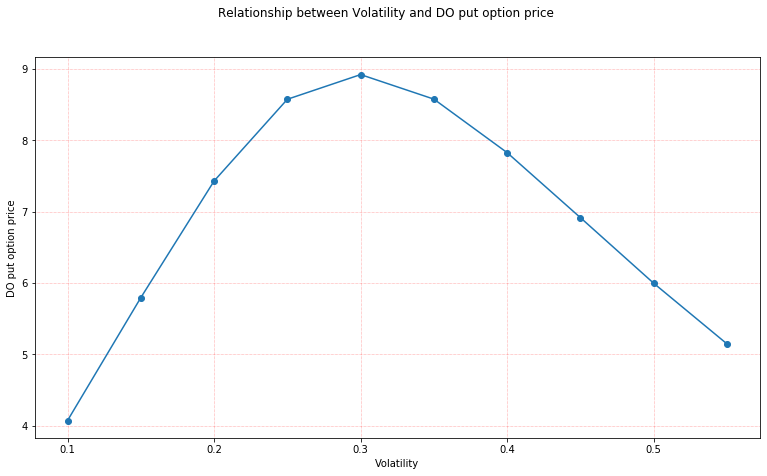

In [26]:
import matplotlib.pyplot as plt

put_DO_price = {}
for i in DO_sigma:
    put_DO_price[i] = DO_put_value(s, k, DO_sb, t, r, i)

keys = list(put_DO_price.keys())
vals = list(put_DO_price.values())
fig = plt.figure(figsize=(13,7))
plt.plot(keys, vals, lw=1.5, marker='o')
plt.xlabel('Volatility')
plt.ylabel('DO put option price')
fig.suptitle('Relationship between Volatility and DO put option price')
plt.grid(True, alpha = 0.7, linestyle=':', linewidth=0.5, color='r')
plt.show()